In [125]:
import pandas as pd
import numpy as np
import seaborn as sns
from ggplot import *
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVR
from sklearn import svm

In [126]:
signif_ORIG = pd.read_table('/Users/jyotsnakumar/Downloads/signif.txt',header=0)
signif_ORIG.head()

,I_D,FLAG_TSUNAMI,YEAR,MONTH,DAY,HOUR,MINUTE,SECOND,FOCAL_DEPTH,EQ_PRIMARY,...,TOTAL_MISSING,TOTAL_MISSING_DESCRIPTION,TOTAL_INJURIES,TOTAL_INJURIES_DESCRIPTION,TOTAL_DAMAGE_MILLIONS_DOLLARS,TOTAL_DAMAGE_DESCRIPTION,TOTAL_HOUSES_DESTROYED,TOTAL_HOUSES_DESTROYED_DESCRIPTION,TOTAL_HOUSES_DAMAGED,TOTAL_HOUSES_DAMAGED_DESCRIPTION
0,1,NaN,-2150,NaN,NaN,NaN,NaN,,NaN,7.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Tsu,-2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,NaN,-2000,NaN,NaN,NaN,NaN,NaN,18.0,7.1,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN
3,5877,Tsu,-1610,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN
4,8,NaN,-1566,NaN,NaN,NaN,NaN,,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### dropping TOTAL Columns, date format columns

In [127]:
signif_ORIG.columns.tolist()

['I_D',
 'FLAG_TSUNAMI',
 'YEAR',
 'MONTH',
 'DAY',
 'HOUR',
 'MINUTE',
 'SECOND',
 'FOCAL_DEPTH',
 'EQ_PRIMARY',
 'EQ_MAG_MW',
 'EQ_MAG_MS',
 'EQ_MAG_MB',
 'EQ_MAG_ML',
 'EQ_MAG_MFA',
 'EQ_MAG_UNK',
 'INTENSITY',
 'COUNTRY',
 'STATE',
 'LOCATION_NAME',
 'LATITUDE',
 'LONGITUDE',
 'REGION_CODE',
 'DEATHS',
 'DEATHS_DESCRIPTION',
 'MISSING',
 'MISSING_DESCRIPTION',
 'INJURIES',
 'INJURIES_DESCRIPTION',
 'DAMAGE_MILLIONS_DOLLARS',
 'DAMAGE_DESCRIPTION',
 'HOUSES_DESTROYED',
 'HOUSES_DESTROYED_DESCRIPTION',
 'HOUSES_DAMAGED',
 'HOUSES_DAMAGED_DESCRIPTION',
 'TOTAL_DEATHS',
 'TOTAL_DEATHS_DESCRIPTION',
 'TOTAL_MISSING',
 'TOTAL_MISSING_DESCRIPTION',
 'TOTAL_INJURIES',
 'TOTAL_INJURIES_DESCRIPTION',
 'TOTAL_DAMAGE_MILLIONS_DOLLARS',
 'TOTAL_DAMAGE_DESCRIPTION',
 'TOTAL_HOUSES_DESTROYED',
 'TOTAL_HOUSES_DESTROYED_DESCRIPTION',
 'TOTAL_HOUSES_DAMAGED',
 'TOTAL_HOUSES_DAMAGED_DESCRIPTION']

In [128]:
signif_ORIG.describe()

/Applications/anaconda/lib/python3.5/site-packages/numpy/lib/function_base.py:4116: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)


,I_D,YEAR,MONTH,DAY,HOUR,MINUTE,FOCAL_DEPTH,EQ_PRIMARY,EQ_MAG_MW,EQ_MAG_MS,...,TOTAL_MISSING,TOTAL_MISSING_DESCRIPTION,TOTAL_INJURIES,TOTAL_INJURIES_DESCRIPTION,TOTAL_DAMAGE_MILLIONS_DOLLARS,TOTAL_DAMAGE_DESCRIPTION,TOTAL_HOUSES_DESTROYED,TOTAL_HOUSES_DESTROYED_DESCRIPTION,TOTAL_HOUSES_DAMAGED,TOTAL_HOUSES_DAMAGED_DESCRIPTION
count,5933.000000,5933.000000,5528.000000,5377.000000,3908.000000,3703.000000,2989.000000,4146.000000,1114.000000,2912.000000,...,25.00000,23.000000,1101.000000,1263.000000,388.00000,3028.000000,7.360000e+02,1637.000000,3.060000e+02,596.000000
mean,4526.044160,1797.782235,6.509045,15.749489,11.280194,28.771807,42.138173,6.492402,6.544883,6.573867,...,1896.64000,1.826087,2599.057221,1.995249,2042.19442,2.191546,1.988629e+04,2.736714,7.828505e+04,2.437919
std,2826.355821,380.243382,3.454204,8.756052,7.028739,17.145815,70.955022,1.040218,0.947117,0.991025,...,8670.29453,1.072473,29062.093568,1.087303,13460.90889,1.040778,2.054335e+05,1.034114,1.200664e+06,1.694630
min,1.000000,-2150.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.600000,3.400000,2.100000,...,1.00000,1.000000,1.000000,1.000000,0.01000,1.000000,1.000000e+00,1.000000,1.000000e+00,1.000000
25%,2091.000000,1812.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,4494.000000,1924.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,6354.000000,1983.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,10238.000000,2017.000000,12.000000,31.000000,23.000000,59.000000,678.000000,9.500000,9.500000,9.100000,...,43476.00000,4.000000,799000.000000,4.000000,220085.45600,4.000000,5.360000e+06,4.000000,2.100000e+07,34.000000


In [129]:
#signif_ORIG.drop(signif_ORIG.columns[3:8], axis=1) .drop(signif_ORIG.columns[12:16], axis=1).drop(signif_ORIG.columns[36:], axis=1)

In [130]:
signif = signif_ORIG.drop(['HOUR','MINUTE','SECOND','EQ_MAG_MS','EQ_MAG_MB','EQ_MAG_ML','EQ_MAG_MFA','EQ_MAG_UNK','TOTAL_DEATHS','TOTAL_DEATHS_DESCRIPTION','TOTAL_MISSING','TOTAL_MISSING_DESCRIPTION','TOTAL_INJURIES','TOTAL_INJURIES_DESCRIPTION','TOTAL_DAMAGE_MILLIONS_DOLLARS','TOTAL_DAMAGE_DESCRIPTION','TOTAL_HOUSES_DESTROYED','TOTAL_HOUSES_DESTROYED_DESCRIPTION','TOTAL_HOUSES_DAMAGED','TOTAL_HOUSES_DAMAGED_DESCRIPTION'],axis=1)

In [131]:
signif.head()

,I_D,FLAG_TSUNAMI,YEAR,MONTH,DAY,FOCAL_DEPTH,EQ_PRIMARY,EQ_MAG_MW,INTENSITY,COUNTRY,...,MISSING,MISSING_DESCRIPTION,INJURIES,INJURIES_DESCRIPTION,DAMAGE_MILLIONS_DOLLARS,DAMAGE_DESCRIPTION,HOUSES_DESTROYED,HOUSES_DESTROYED_DESCRIPTION,HOUSES_DAMAGED,HOUSES_DAMAGED_DESCRIPTION
0,1,NaN,-2150,NaN,NaN,NaN,7.3,NaN,NaN,JORDAN,...,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN
1,2,Tsu,-2000,NaN,NaN,NaN,NaN,NaN,10.0,SYRIA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,NaN,-2000,NaN,NaN,18.0,7.1,NaN,10.0,TURKMENISTAN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN
3,5877,Tsu,-1610,NaN,NaN,NaN,NaN,NaN,NaN,GREECE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,8,NaN,-1566,NaN,NaN,NaN,NaN,NaN,10.0,ISRAEL,...,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN


In [132]:
#signif_ORIG.drop(signif_ORIG.columns[[3,4,5,6,7,8,12,13,14,15,16,36,37,38,39,40,41,42,43,44,45,46,47]], axis=1, inplace= True)

In [133]:
signif.isnull().sum()

I_D                                0
FLAG_TSUNAMI                    4164
YEAR                               0
MONTH                            405
DAY                              556
FOCAL_DEPTH                     2944
EQ_PRIMARY                      1787
EQ_MAG_MW                       4819
INTENSITY                       3295
COUNTRY                            0
STATE                           5633
LOCATION_NAME                      1
LATITUDE                          49
LONGITUDE                         49
REGION_CODE                        7
DEATHS                          4008
DEATHS_DESCRIPTION              3541
MISSING                         5914
MISSING_DESCRIPTION             5914
INJURIES                        4846
INJURIES_DESCRIPTION            4676
DAMAGE_MILLIONS_DOLLARS         5480
DAMAGE_DESCRIPTION              1717
HOUSES_DESTROYED                5227
HOUSES_DESTROYED_DESCRIPTION    4370
HOUSES_DAMAGED                  5561
HOUSES_DAMAGED_DESCRIPTION      5201
d

In [134]:
signif.EQ_MAG_MW.fillna(signif.EQ_PRIMARY, inplace=True)
signif.drop('EQ_PRIMARY',axis=1)

,I_D,FLAG_TSUNAMI,YEAR,MONTH,DAY,FOCAL_DEPTH,EQ_MAG_MW,INTENSITY,COUNTRY,STATE,...,MISSING,MISSING_DESCRIPTION,INJURIES,INJURIES_DESCRIPTION,DAMAGE_MILLIONS_DOLLARS,DAMAGE_DESCRIPTION,HOUSES_DESTROYED,HOUSES_DESTROYED_DESCRIPTION,HOUSES_DAMAGED,HOUSES_DAMAGED_DESCRIPTION
0,1,NaN,-2150,NaN,NaN,NaN,7.3,NaN,JORDAN,NaN,...,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN
1,2,Tsu,-2000,NaN,NaN,NaN,NaN,10.0,SYRIA,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,NaN,-2000,NaN,NaN,18.0,7.1,10.0,TURKMENISTAN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN
3,5877,Tsu,-1610,NaN,NaN,NaN,NaN,NaN,GREECE,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,8,NaN,-1566,NaN,NaN,NaN,NaN,10.0,ISRAEL,NaN,...,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN
5,11,NaN,-1450,NaN,NaN,NaN,NaN,10.0,ITALY,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,9712,Tsu,-1365,NaN,NaN,NaN,NaN,NaN,SYRIA,NaN,...,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN
7,12,NaN,-1250,NaN,NaN,NaN,6.5,NaN,ISRAEL,NaN,...,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN
8,13,NaN,-1050,NaN,NaN,NaN,6.2,NaN,JORDAN,NaN,...,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN
9,14,NaN,-759,NaN,NaN,NaN,NaN,11.0,ISRAEL,NaN,...,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN


In [135]:
signif.head()
signif.isnull().sum()
#temporarily dropped eq_primary. after merging also null values count of eq_mw is 1787, becuase there is no difference in the values of both columns
#missing values not filled, as not yet decided.

I_D                                0
FLAG_TSUNAMI                    4164
YEAR                               0
MONTH                            405
DAY                              556
FOCAL_DEPTH                     2944
EQ_PRIMARY                      1787
EQ_MAG_MW                       1787
INTENSITY                       3295
COUNTRY                            0
STATE                           5633
LOCATION_NAME                      1
LATITUDE                          49
LONGITUDE                         49
REGION_CODE                        7
DEATHS                          4008
DEATHS_DESCRIPTION              3541
MISSING                         5914
MISSING_DESCRIPTION             5914
INJURIES                        4846
INJURIES_DESCRIPTION            4676
DAMAGE_MILLIONS_DOLLARS         5480
DAMAGE_DESCRIPTION              1717
HOUSES_DESTROYED                5227
HOUSES_DESTROYED_DESCRIPTION    4370
HOUSES_DAMAGED                  5561
HOUSES_DAMAGED_DESCRIPTION      5201
d

In [136]:
signif.EQ_MAG_MW.value_counts(dropna=False)

NaN     1787
 7.5     249
 7.0     219
 6.0     197
 6.5     192
 5.5     171
 6.8     154
 7.6     140
 6.3     137
 7.3     126
 6.7     121
 7.7     118
 7.8     115
 5.8     114
 6.4     112
 6.1     109
 6.2     108
 6.6     105
 6.9     105
 7.9      94
 7.2      94
 5.6      93
 7.1      91
 5.0      89
 5.9      87
 5.3      84
 5.7      82
 5.4      77
 5.1      70
 5.2      69
        ... 
 4.8      44
 8.1      42
 8.3      39
 4.7      37
 4.6      36
 8.2      26
 8.4      25
 4.3      23
 4.4      22
 8.5      19
 4.1      16
 4.2      15
 8.6      12
 4.0       7
 8.7       5
 3.5       4
 8.8       3
 3.8       3
 3.2       2
 3.7       2
 9.0       2
 3.1       2
 9.1       2
 3.4       2
 2.2       1
 9.2       1
 2.1       1
 1.6       1
 3.9       1
 9.5       1
Name: EQ_MAG_MW, dtype: int64

In [137]:
signif.shape

(5933, 27)

In [138]:
signif.dtypes

I_D                               int64
FLAG_TSUNAMI                     object
YEAR                              int64
MONTH                           float64
DAY                             float64
FOCAL_DEPTH                     float64
EQ_PRIMARY                      float64
EQ_MAG_MW                       float64
INTENSITY                       float64
COUNTRY                          object
STATE                            object
LOCATION_NAME                    object
LATITUDE                         object
LONGITUDE                        object
REGION_CODE                     float64
DEATHS                          float64
DEATHS_DESCRIPTION              float64
MISSING                         float64
MISSING_DESCRIPTION             float64
INJURIES                        float64
INJURIES_DESCRIPTION            float64
DAMAGE_MILLIONS_DOLLARS         float64
DAMAGE_DESCRIPTION              float64
HOUSES_DESTROYED                float64
HOUSES_DESTROYED_DESCRIPTION    float64


In [139]:
signif_s=signif.sort_values(by=['COUNTRY','LOCATION_NAME','LATITUDE','LONGITUDE','REGION_CODE'])

In [140]:
signif_s.LATITUDE=pd.to_numeric(signif_s['LATITUDE'], errors='coerce')
signif_s.LONGITUDE=pd.to_numeric(signif_s['LONGITUDE'], errors='coerce')

In [141]:
signif_s1=signif_s[['I_D','YEAR','COUNTRY','LOCATION_NAME','LATITUDE','LONGITUDE','REGION_CODE']]

In [142]:
signif_s1.ix[2023,'LOCATION_NAME']='NEW ZEALAND: RAINBOW 7072'

/Applications/anaconda/lib/python3.5/site-packages/pandas/core/indexing.py:465: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [143]:
signif_s1.isnull().sum()

I_D               0
YEAR              0
COUNTRY           0
LOCATION_NAME     0
LATITUDE         54
LONGITUDE        50
REGION_CODE       7
dtype: int64

In [144]:
signif_s1.fillna(method='ffill',inplace=True)

/Applications/anaconda/lib/python3.5/site-packages/pandas/core/frame.py:2762: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


In [145]:
signif_s1.isnull().sum()

I_D              0
YEAR             0
COUNTRY          0
LOCATION_NAME    0
LATITUDE         0
LONGITUDE        0
REGION_CODE      0
dtype: int64

In [146]:
signif_s1[['FLAG_TSUNAMI','EQ_PRIMARY', 'EQ_MAG_MW','FOCAL_DEPTH',
       'INTENSITY','DAMAGE_MILLIONS_DOLLARS','DAMAGE_DESCRIPTION','DEATHS','DEATHS_DESCRIPTION']]=signif_s[['FLAG_TSUNAMI','EQ_PRIMARY', 'EQ_MAG_MW','FOCAL_DEPTH',
       'INTENSITY','DAMAGE_MILLIONS_DOLLARS','DAMAGE_DESCRIPTION','DEATHS','DEATHS_DESCRIPTION']]

/Applications/anaconda/lib/python3.5/site-packages/pandas/core/frame.py:2378: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [147]:
signif_s1.count()

I_D                        5933
YEAR                       5933
COUNTRY                    5933
LOCATION_NAME              5933
LATITUDE                   5933
LONGITUDE                  5933
REGION_CODE                5933
FLAG_TSUNAMI               1769
EQ_PRIMARY                 4146
EQ_MAG_MW                  4146
FOCAL_DEPTH                2989
INTENSITY                  2638
DAMAGE_MILLIONS_DOLLARS     453
DAMAGE_DESCRIPTION         4216
DEATHS                     1925
DEATHS_DESCRIPTION         2392
dtype: int64

In [148]:
signif_s1[pd.notnull(signif_s1.DAMAGE_DESCRIPTION)].count()

I_D                        4216
YEAR                       4216
COUNTRY                    4216
LOCATION_NAME              4216
LATITUDE                   4216
LONGITUDE                  4216
REGION_CODE                4216
FLAG_TSUNAMI                884
EQ_PRIMARY                 3110
EQ_MAG_MW                  3110
FOCAL_DEPTH                2207
INTENSITY                  2059
DAMAGE_MILLIONS_DOLLARS     453
DAMAGE_DESCRIPTION         4216
DEATHS                     1789
DEATHS_DESCRIPTION         2168
dtype: int64

In [149]:
signif_s1[pd.isnull(signif_s1.DAMAGE_DESCRIPTION)].count()#sort_values(by=['EQ_MAG_MW'])

I_D                        1717
YEAR                       1717
COUNTRY                    1717
LOCATION_NAME              1717
LATITUDE                   1717
LONGITUDE                  1717
REGION_CODE                1717
FLAG_TSUNAMI                885
EQ_PRIMARY                 1036
EQ_MAG_MW                  1036
FOCAL_DEPTH                 782
INTENSITY                   579
DAMAGE_MILLIONS_DOLLARS       0
DAMAGE_DESCRIPTION            0
DEATHS                      136
DEATHS_DESCRIPTION          224
dtype: int64

In [150]:
## Creating a subset of  the dataset where damage description is not null
signif_s1_damage= signif_s1[pd.notnull(signif_s1.DAMAGE_DESCRIPTION)]

In [151]:
##Creating a subset where damage description is null
signif_s1_nodamage= signif_s1[pd.isnull(signif_s1.DAMAGE_DESCRIPTION)]

In [152]:
##Only retaining records where the magnitude is present.
##Rest of the 681 records have no magnitude and damage information.
signif_s1_nodamage=signif_s1_nodamage[pd.notnull(signif_s1_nodamage.EQ_MAG_MW)]

In [153]:
signif_s1_nodamage.count()

I_D                        1036
YEAR                       1036
COUNTRY                    1036
LOCATION_NAME              1036
LATITUDE                   1036
LONGITUDE                  1036
REGION_CODE                1036
FLAG_TSUNAMI                545
EQ_PRIMARY                 1036
EQ_MAG_MW                  1036
FOCAL_DEPTH                 729
INTENSITY                   262
DAMAGE_MILLIONS_DOLLARS       0
DAMAGE_DESCRIPTION            0
DEATHS                       85
DEATHS_DESCRIPTION          128
dtype: int64

In [154]:
signif_s1_damage.count()

I_D                        4216
YEAR                       4216
COUNTRY                    4216
LOCATION_NAME              4216
LATITUDE                   4216
LONGITUDE                  4216
REGION_CODE                4216
FLAG_TSUNAMI                884
EQ_PRIMARY                 3110
EQ_MAG_MW                  3110
FOCAL_DEPTH                2207
INTENSITY                  2059
DAMAGE_MILLIONS_DOLLARS     453
DAMAGE_DESCRIPTION         4216
DEATHS                     1789
DEATHS_DESCRIPTION         2168
dtype: int64

In [155]:
signif_s1_damage.dtypes

I_D                          int64
YEAR                         int64
COUNTRY                     object
LOCATION_NAME               object
LATITUDE                   float64
LONGITUDE                  float64
REGION_CODE                float64
FLAG_TSUNAMI                object
EQ_PRIMARY                 float64
EQ_MAG_MW                  float64
FOCAL_DEPTH                float64
INTENSITY                  float64
DAMAGE_MILLIONS_DOLLARS    float64
DAMAGE_DESCRIPTION         float64
DEATHS                     float64
DEATHS_DESCRIPTION         float64
dtype: object

In [156]:
##dividing datasets (where damage description is present) into test and train for predicting & imputing magnitude
signif_s1_damage_train = signif_s1_damage[pd.notnull(signif_s1_damage['EQ_MAG_MW'])]
signif_s1_damage_test = signif_s1_damage[pd.isnull(signif_s1_damage['EQ_MAG_MW'])]

In [157]:
signif_s1_damage_train.count()

I_D                        3110
YEAR                       3110
COUNTRY                    3110
LOCATION_NAME              3110
LATITUDE                   3110
LONGITUDE                  3110
REGION_CODE                3110
FLAG_TSUNAMI                759
EQ_PRIMARY                 3110
EQ_MAG_MW                  3110
FOCAL_DEPTH                2180
INTENSITY                  1529
DAMAGE_MILLIONS_DOLLARS     439
DAMAGE_DESCRIPTION         3110
DEATHS                     1484
DEATHS_DESCRIPTION         1721
dtype: int64

In [158]:
signif_s1_damage_test.count()

I_D                        1106
YEAR                       1106
COUNTRY                    1106
LOCATION_NAME              1106
LATITUDE                   1106
LONGITUDE                  1106
REGION_CODE                1106
FLAG_TSUNAMI                125
EQ_PRIMARY                    0
EQ_MAG_MW                     0
FOCAL_DEPTH                  27
INTENSITY                   530
DAMAGE_MILLIONS_DOLLARS      14
DAMAGE_DESCRIPTION         1106
DEATHS                      305
DEATHS_DESCRIPTION          447
dtype: int64

## Impute magnitude for NaNs using Non-Parametric modelling techniques

In [159]:
X=signif_s1_damage_train[['LATITUDE','LONGITUDE','DAMAGE_DESCRIPTION']]
Y=signif_s1_damage_train[['EQ_MAG_MW']]

In [160]:
Xtrain,Xvalidate,Ytrain,Yvalidate=train_test_split(X,Y,test_size=0.2,random_state=200)

In [161]:
## run K-NN Regressor to train the data.

model=KNeighborsRegressor(algorithm='auto',leaf_size=30,metric='euclidean',metric_params=None,n_jobs=1,n_neighbors=10,p=2,weights='distance')
model.fit(Xtrain,Ytrain)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='euclidean',
          metric_params=None, n_jobs=1, n_neighbors=10, p=2,
          weights='distance')

In [162]:
##Predict the magnitude on the validation data
expected =Yvalidate
predicted=model.predict(Xvalidate)

In [163]:
print (metrics.mean_squared_error(expected,predicted))
print(metrics.explained_variance_score(expected,predicted))
print(metrics.r2_score(expected,predicted))

0.630292357112
0.424602818213
0.422466078113


In [164]:
Xtrain,Xvalidate,Ytrain,Yvalidate=train_test_split(X,Y,test_size=0.2,random_state=200)

In [165]:
##run Random Forest regressor

model_rf = RandomForestRegressor(n_estimators = 100, oob_score = True, n_jobs = -1,random_state =200,max_features = "auto", min_samples_leaf = 5)                                   
model_rf.fit(Xtrain,Ytrain)

/Applications/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=5,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=-1, oob_score=True, random_state=200,
           verbose=0, warm_start=False)

In [166]:
##Predict the magnitude on the validation data
expected =Yvalidate
predicted=model_rf.predict(Xvalidate)

In [167]:
print(metrics.mean_squared_error(expected,predicted))
print(metrics.explained_variance_score(expected,predicted))
print(metrics.r2_score(expected,predicted))

0.586908393809
0.46221892899
0.462218599607


In [168]:
##Assign Xtest for prediction 
Xtest=signif_s1_damage_test[['LATITUDE','LONGITUDE','DAMAGE_DESCRIPTION']]

In [169]:
##Predict EQ_MAG_MW using RF model
signif_s1_damage_test[['EQ_MAG_MW']]=model_rf.predict(Xtest)

/Applications/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/Applications/anaconda/lib/python3.5/site-packages/pandas/core/indexing.py:465: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [170]:
## Predict EQ_Primary using Knn model
signif_s1_damage_test[['EQ_PRIMARY']]=model.predict(Xtest)

/Applications/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/Applications/anaconda/lib/python3.5/site-packages/pandas/core/indexing.py:465: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [171]:
signif_s1_damage_test

,I_D,YEAR,COUNTRY,LOCATION_NAME,LATITUDE,LONGITUDE,REGION_CODE,FLAG_TSUNAMI,EQ_PRIMARY,EQ_MAG_MW,FOCAL_DEPTH,INTENSITY,DAMAGE_MILLIONS_DOLLARS,DAMAGE_DESCRIPTION,DEATHS,DEATHS_DESCRIPTION
2118,2220,1874,AFGHANISTAN,AFGHANISTAN,35.00,69.00,40.0,NaN,6.091577,6.312922,NaN,NaN,NaN,3.0,NaN,3.0
1620,1751,1832,AFGHANISTAN,AFGHANISTAN,36.50,71.00,40.0,NaN,7.016544,6.616655,NaN,NaN,NaN,3.0,NaN,3.0
57,46,50,AFGHANISTAN,AFGHANISTAN: AIKHANUM,37.00,68.50,40.0,NaN,5.886868,5.977696,NaN,NaN,NaN,2.0,NaN,NaN
1697,1834,1842,AFGHANISTAN,AFGHANISTAN: JALALABAD,34.40,70.50,40.0,NaN,6.480745,6.339773,NaN,NaN,NaN,3.0,500.0,3.0
607,667,1505,AFGHANISTAN,AFGHANISTAN: KABUL,34.50,69.20,40.0,NaN,6.070411,6.288911,NaN,12.0,NaN,3.0,NaN,3.0
2401,2500,1897,ALBANIA,ALBANIA,40.00,20.10,130.0,NaN,6.400000,6.314007,NaN,9.0,NaN,2.0,NaN,NaN
1769,1908,1851,ALBANIA,ALBANIA,41.20,20.20,130.0,NaN,5.797636,5.752898,NaN,9.0,NaN,2.0,NaN,NaN
1779,1922,1851,ALBANIA,ALBANIA: BERAT,40.50,19.70,130.0,NaN,5.840496,5.998512,NaN,10.0,NaN,3.0,400.0,3.0
1823,1964,1854,ALBANIA,"ALBANIA: DELVINE, SULI, GZIG",39.50,20.50,130.0,NaN,7.500000,6.391157,NaN,10.0,NaN,3.0,NaN,3.0
1892,2025,1858,ALBANIA,"ALBANIA: DELVINON, BERATI; GREECE: CORFU",40.00,20.00,130.0,NaN,6.109513,6.007066,NaN,10.0,NaN,3.0,12.0,1.0


In [172]:
## Combine all the 3 dataframes into one
signif_final=pd.concat([signif_s1_damage_train,signif_s1_nodamage,signif_s1_damage_test])

In [173]:
signif_final.count()

I_D                        5252
YEAR                       5252
COUNTRY                    5252
LOCATION_NAME              5252
LATITUDE                   5252
LONGITUDE                  5252
REGION_CODE                5252
FLAG_TSUNAMI               1429
EQ_PRIMARY                 5252
EQ_MAG_MW                  5252
FOCAL_DEPTH                2936
INTENSITY                  2321
DAMAGE_MILLIONS_DOLLARS     453
DAMAGE_DESCRIPTION         4216
DEATHS                     1874
DEATHS_DESCRIPTION         2296
dtype: int64

In [174]:
desc= signif_final.describe()
desc
#desc.to_csv('/Users/jyotsnakumar/Documents/BDAP-04/Project/Descriptive_stats.csv')

/Applications/anaconda/lib/python3.5/site-packages/numpy/lib/function_base.py:4116: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)


,I_D,YEAR,LATITUDE,LONGITUDE,REGION_CODE,EQ_PRIMARY,EQ_MAG_MW,FOCAL_DEPTH,INTENSITY,DAMAGE_MILLIONS_DOLLARS,DAMAGE_DESCRIPTION,DEATHS,DEATHS_DESCRIPTION
count,5252.000000,5252.000000,5252.000000,5252.000000,5252.000000,5252.000000,5252.000000,2936.000000,2321.000000,453.000000,4216.000000,1874.000000,2296.000000
mean,4560.626238,1820.155560,22.206265,40.096196,108.333016,6.439897,6.451534,41.970368,8.250323,1742.389607,2.268501,3872.467983,2.039199
std,2777.725624,352.901988,22.654855,87.596024,55.052615,0.975121,0.965030,70.837969,1.599779,12471.925024,0.953741,26368.386050,1.160811
min,1.000000,-2150.000000,-62.877000,-179.984000,10.000000,1.600000,1.600000,0.000000,2.000000,0.013000,1.000000,1.000000,0.000000
25%,2231.500000,1834.000000,9.815750,-5.897500,40.000000,5.722458,5.800000,NaN,NaN,NaN,NaN,NaN,NaN
50%,4514.500000,1935.000000,31.265000,48.707000,130.000000,6.487720,6.479800,NaN,NaN,NaN,NaN,NaN,NaN
75%,6331.250000,1988.000000,38.500000,117.044750,160.000000,7.200000,7.200000,NaN,NaN,NaN,NaN,NaN,NaN
max,10238.000000,2017.000000,73.122000,180.000000,170.000000,9.500000,9.500000,678.000000,12.000000,220000.000000,4.000000,830000.000000,4.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11ef745f8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11b2527b8>]], dtype=object)

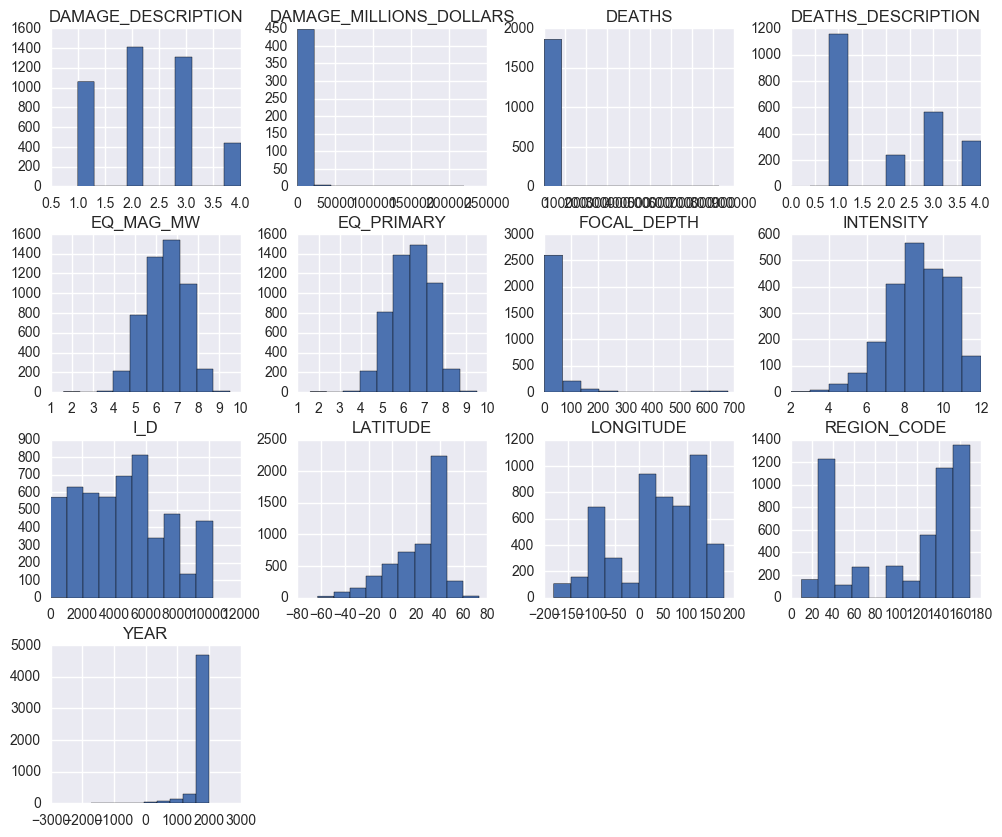

In [175]:
signif_final.hist(figsize=(12,10))

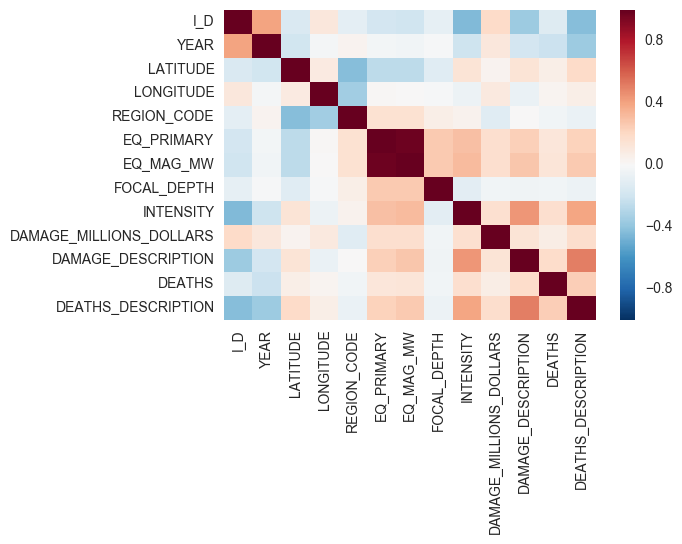

In [176]:
sns.heatmap(signif_final.corr())

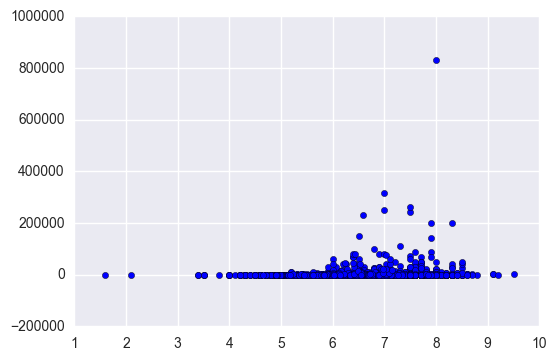

In [177]:
plt.scatter(signif_final.EQ_MAG_MW,signif_final.DEATHS)

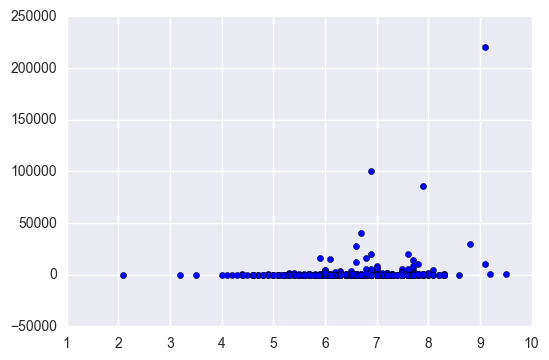

In [178]:
plt.scatter(signif_final.EQ_MAG_MW,signif_final.DAMAGE_MILLIONS_DOLLARS)

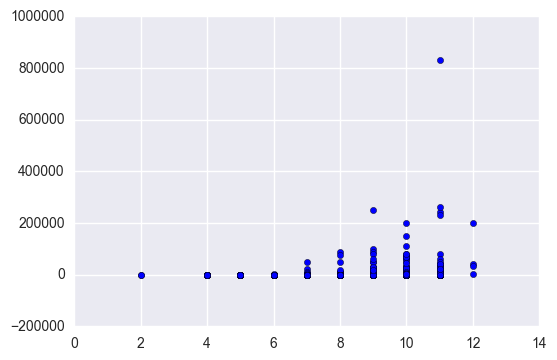

In [179]:
plt.scatter(signif_final.INTENSITY,signif_final.DEATHS)

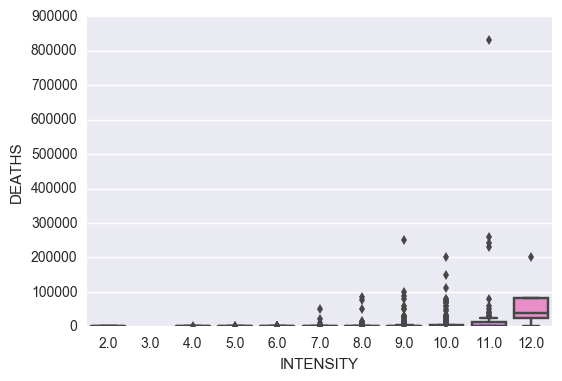

In [180]:
sns.boxplot(signif_final.INTENSITY,signif_final.DEATHS)

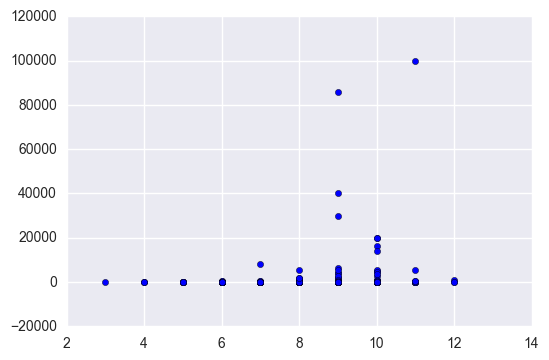

In [181]:
plt.scatter(signif_final.INTENSITY,signif_final.DAMAGE_MILLIONS_DOLLARS)

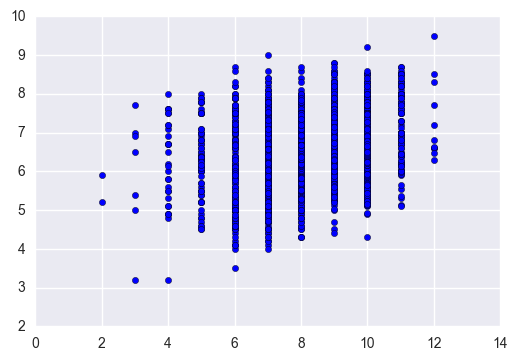

In [182]:
plt.scatter(signif_final.INTENSITY,signif_final.EQ_MAG_MW)

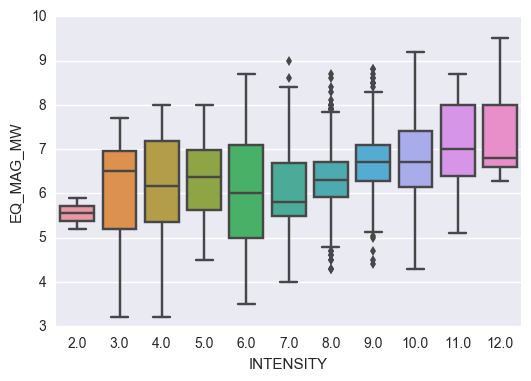

In [183]:
sns.boxplot(signif_final.INTENSITY,signif_final.EQ_MAG_MW)

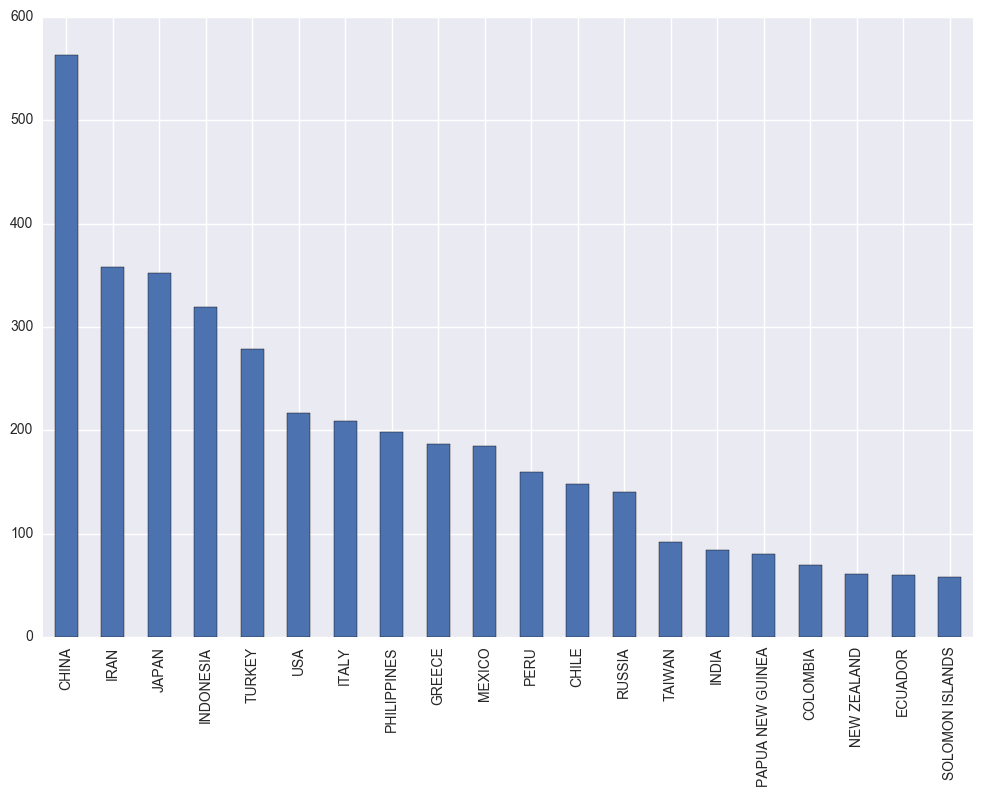

In [184]:
signif_final.COUNTRY.value_counts().nlargest(20).plot(kind='bar',figsize=(12,8))
plt.savefig('/Users/jyotsnakumar/Documents/BDAP-04/Project/Country wise number of earthquakes.png', bbox_inches='tight')

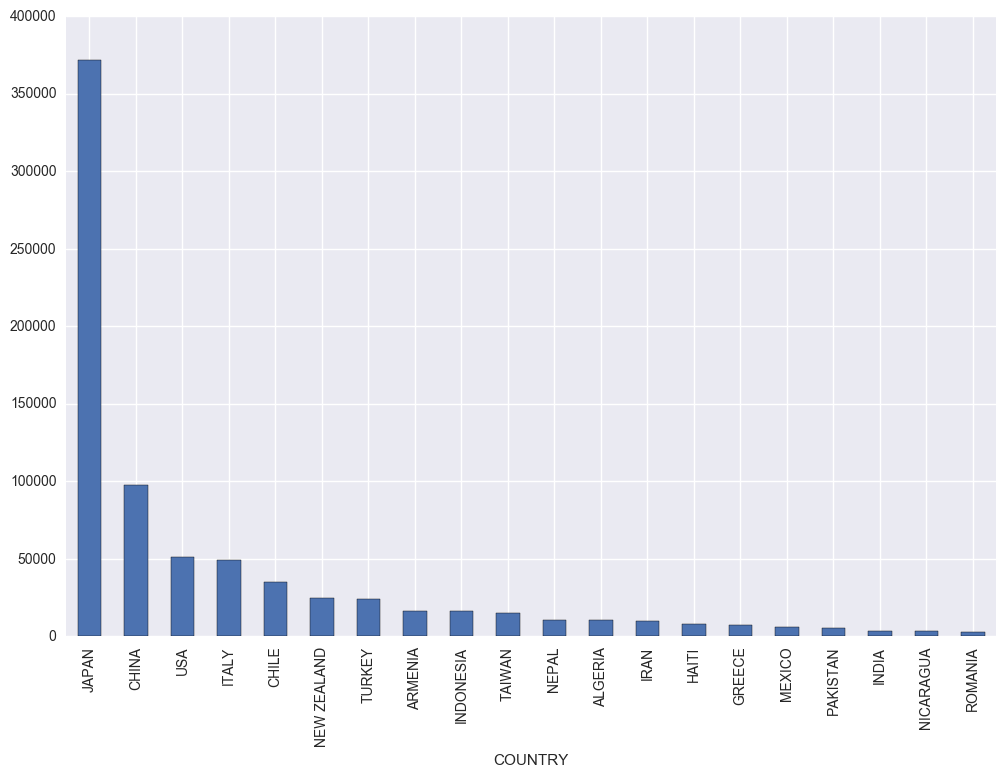

In [185]:
signif_final.groupby(['COUNTRY'])['DAMAGE_MILLIONS_DOLLARS'].sum().nlargest(20).plot(kind='bar',figsize=(12,8))
plt.savefig('/Users/jyotsnakumar/Documents/BDAP-04/Project/Country wise financial damage.png', bbox_inches='tight')

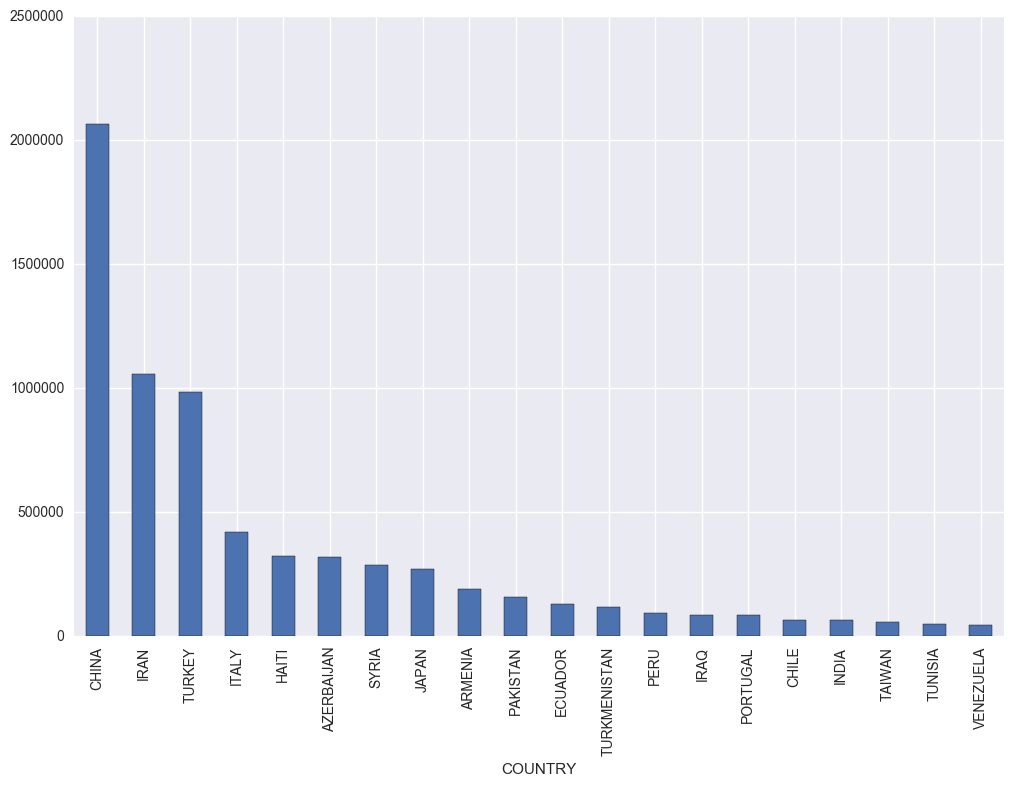

In [186]:
signif_final.groupby(['COUNTRY'])['DEATHS'].sum().nlargest(20).plot(kind='bar',figsize=(12,8))
plt.savefig('/Users/jyotsnakumar/Documents/BDAP-04/Project/Country wise number of deaths.png', bbox_inches='tight')

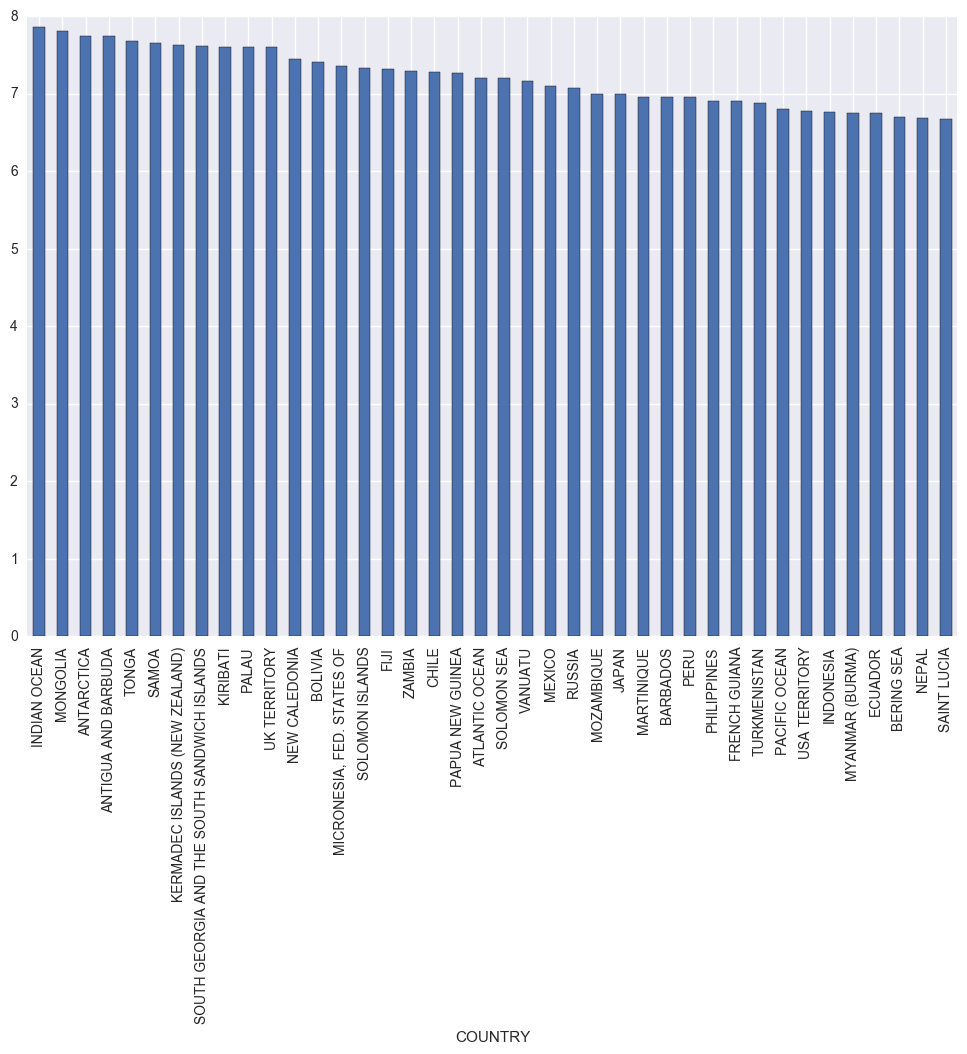

In [187]:
signif_final.groupby(['COUNTRY'])['EQ_MAG_MW'].mean().nlargest(40).plot(kind='bar',figsize=(12,8))
plt.savefig('/Users/jyotsnakumar/Documents/BDAP-04/Project/Country wise Average magnitude of earthquakes.png', bbox_inches='tight')

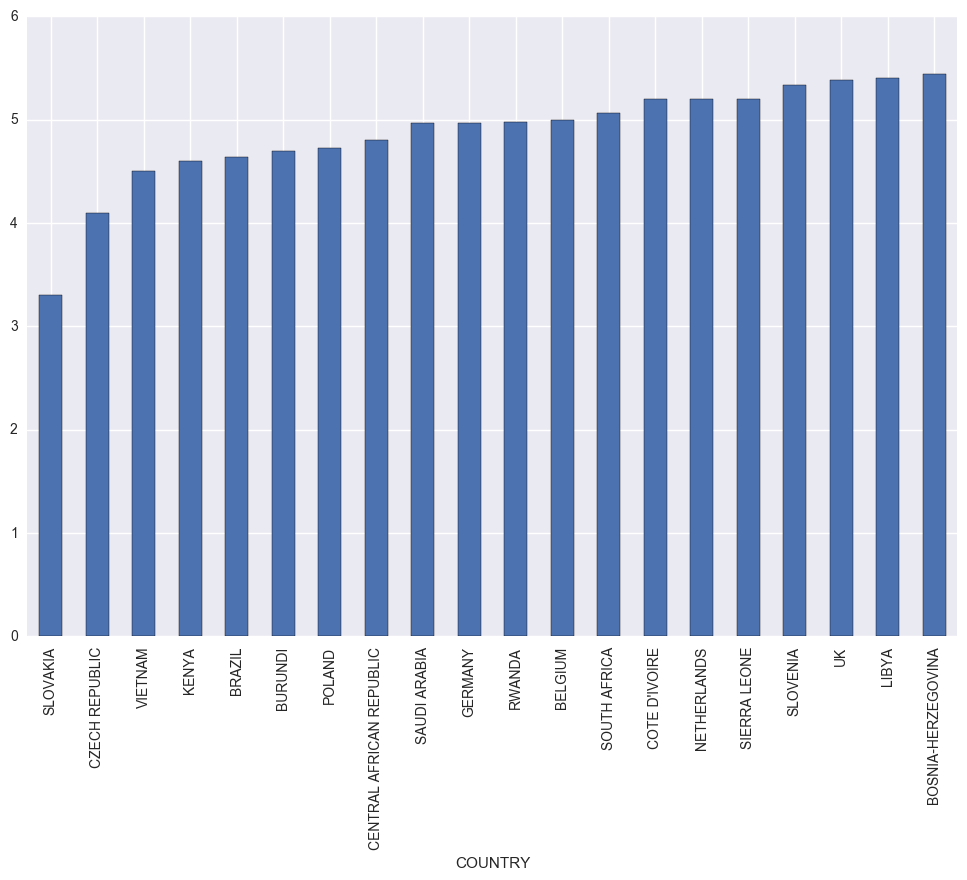

In [188]:
signif_final.groupby(['COUNTRY'])['EQ_MAG_MW'].mean().nsmallest(20).plot(kind='bar',figsize=(12,8))

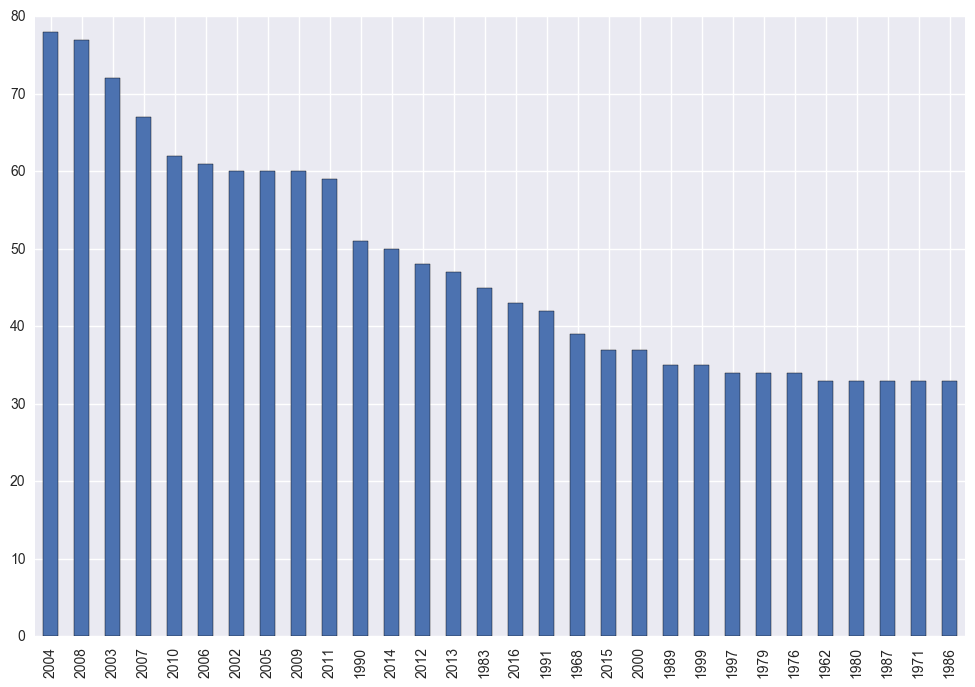

In [189]:
signif_final.YEAR.value_counts().nlargest(30).plot(kind='bar',figsize=(12,8))
plt.savefig('/Users/jyotsnakumar/Documents/BDAP-04/Project/Year wise frequency of earthquakes.png', bbox_inches='tight')

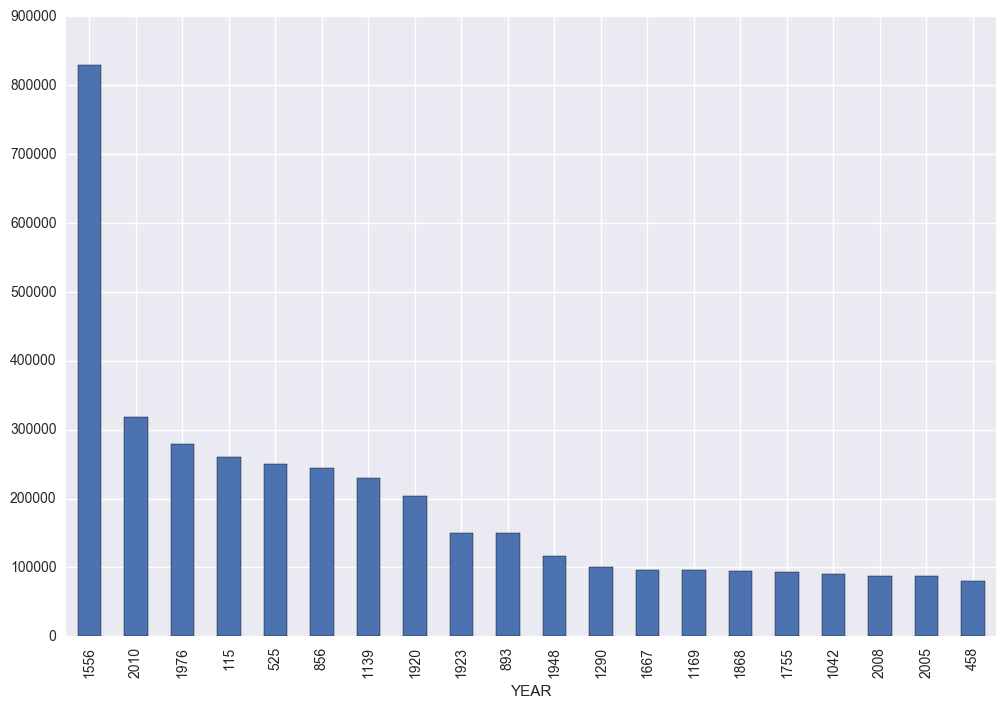

In [190]:
ax= signif_final.groupby(['YEAR'])['DEATHS'].sum().nlargest(20).plot(kind='bar',figsize=(12,8))
plt.savefig('/Users/jyotsnakumar/Documents/BDAP-04/Project/Year wise total number of deaths.png', bbox_inches='tight')

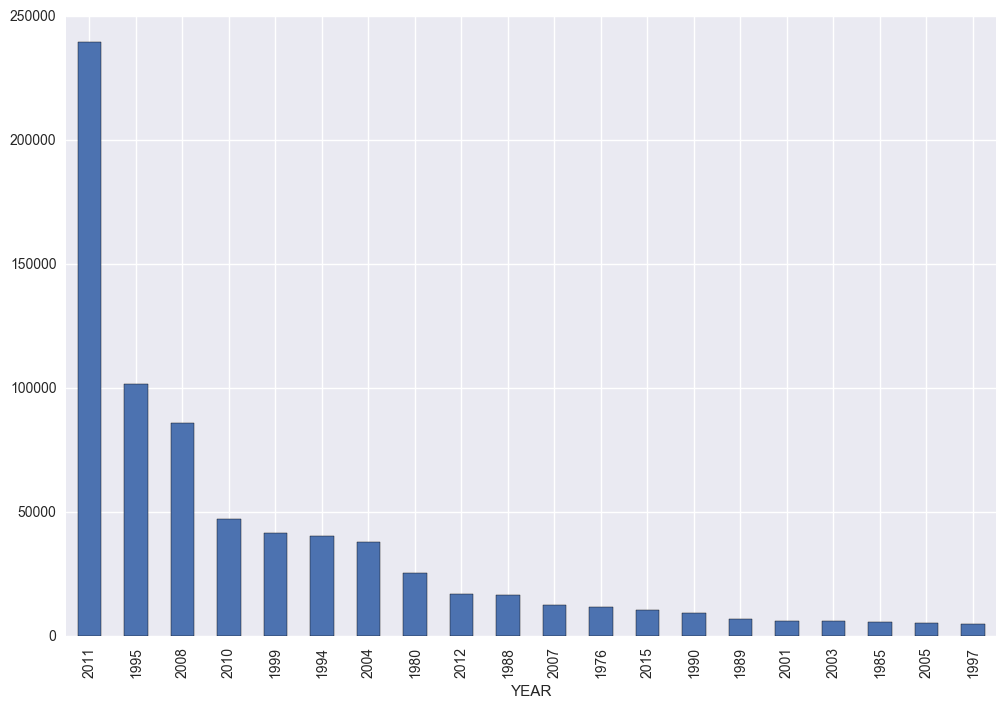

In [191]:
ax= signif_final.groupby(['YEAR'])['DAMAGE_MILLIONS_DOLLARS'].sum().nlargest(20).plot(kind='bar',figsize=(12,8))
plt.savefig('/Users/jyotsnakumar/Documents/BDAP-04/Project/Year wise financial damage.png', bbox_inches='tight')

In [192]:
signif_intensity=signif_final[pd.notnull(signif_final["INTENSITY"])]

In [193]:
signif_death=signif_intensity[pd.notnull(signif_intensity["DEATHS"])]

In [194]:
model=KMeans(n_clusters=4)

In [195]:
model.fit(signif_death.ix[:,['DEATHS','DEATHS_DESCRIPTION','INTENSITY','EQ_MAG_MW']])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [196]:
signif_death['CLUSTER']=model.labels_

/Applications/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [197]:
signif_death.sort_values(['CLUSTER'])

,I_D,YEAR,COUNTRY,LOCATION_NAME,LATITUDE,LONGITUDE,REGION_CODE,FLAG_TSUNAMI,EQ_PRIMARY,EQ_MAG_MW,FOCAL_DEPTH,INTENSITY,DAMAGE_MILLIONS_DOLLARS,DAMAGE_DESCRIPTION,DEATHS,DEATHS_DESCRIPTION,CLUSTER
4708,5274,1991,AFGHANISTAN,"AFGHANISTAN: BADAKHSTAN, BAGHLAN, LAGHMAN, NA...",35.993,70.423,40.0,NaN,6.400000,6.400000,142.0,7.0,36.000,4.0,848.0,3.0,0
1401,1516,1792,TAIWAN,"TAIWAN: JIAYI, TAINAN",23.600,120.500,30.0,Tsu,6.800000,6.800000,NaN,9.0,NaN,3.0,252.0,3.0,0
3230,3546,1935,TAIWAN,TAIWAN: MIALOI,24.300,120.800,30.0,NaN,6.000000,6.000000,NaN,8.0,NaN,4.0,3276.0,4.0,0
4966,5535,1999,TAIWAN,"TAIWAN: NANTOU, TAICHUNG, TAIZHONG",23.772,120.982,30.0,NaN,7.700000,7.700000,33.0,10.0,14000.000,4.0,2297.0,4.0,0
2198,7891,1881,TAIWAN,TAIWAN: S of XINZHU,24.500,120.700,30.0,NaN,5.500000,5.500000,NaN,7.0,NaN,2.0,11.0,1.0,0
1167,1265,1736,TAIWAN,TAIWAN: TAINAN,23.100,120.300,30.0,NaN,6.000000,6.000000,NaN,8.0,NaN,2.0,260.0,3.0,0
1940,2059,1862,TAIWAN,TAIWAN: TAINAN,23.400,120.000,30.0,NaN,6.500000,6.500000,NaN,8.0,NaN,3.0,2000.0,4.0,0
4552,5116,1986,TAIWAN,"TAIWAN: TAIPEI, HUALIEN",23.901,121.574,30.0,Tsu,7.800000,7.800000,34.0,8.0,NaN,1.0,15.0,1.0,0
2405,8108,1897,TAIWAN,TAIWAN: YILAN,24.700,121.800,30.0,NaN,6.000000,6.000000,NaN,8.0,NaN,1.0,56.0,2.0,0
2228,9940,1882,TAIWAN,TAIWAN: ZHANGHUA,23.800,120.500,30.0,Tsu,6.300000,6.300000,NaN,8.0,NaN,1.0,8.0,1.0,0


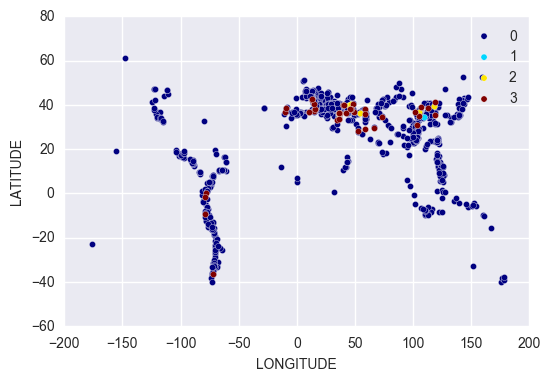

In [198]:
# Creating a discrete colorbar
colors = plt.cm.jet(np.linspace(0, 1, 4))

current_plot_range = 0
previous_plot_range = 0
labels=model.labels_

for i,c in enumerate(colors):
    previous_plot_range += current_plot_range
    current_plot_range = labels[labels==i].size
    plt.scatter(
       signif_death[      
             signif_death['CLUSTER']==i].LONGITUDE,
       signif_death[      
             signif_death['CLUSTER']==i].LATITUDE,
        lw=.25, marker='o',color=c, label=i, 
       edgecolors="white")    
plt.legend()
plt.xlabel('LONGITUDE', fontsize=10)
plt.ylabel('LATITUDE', fontsize=10)
plt.savefig('/Users/jyotsnakumar/Documents/BDAP-04/Project/Lat-Long plot of Deaths.png', bbox_inches='tight')

In [199]:
## cluster 0 - low death count
## cluster 1 - highest number of deaths
## cluster 2 - moderately high death count
## cluster 3 - average death count

## R Code for Death Prediction using Generalized Linear Model

library(MASS)
library(boot)

##Load the Earthquake data (with magnitude imputed)

signif<- read.csv("/Users/jyotsnakumar/Documents/BDAP-04/Project/signif_final.csv")
head(signif)
summary((signif))
str(signif)
signif$REGION_CODE<-as.factor(signif$REGION_CODE)


##Create a dataframe where Intensity is not null
##2321 records have data for intensity

nrow(signif[!is.na(signif$INTENSITY),])
signif_intensity<-signif[!is.na(signif$INTENSITY),]
summary(signif_intensity)
nrow(signif_intensity)

##Create a dataframe from Intensity dataset where Death is not null
##There are 970 records with Death

nrow(signif_intensity[!is.na(signif_intensity$DEATHS),])
signif_death<-signif_intensity[!is.na(signif_intensity$DEATHS),]
nrow(signif_death)
summary(signif_death)
str(signif_death)

##Initial analysis

##Mean - Variance Ratio
d<-c(mean(signif_death$DEATHS),var(signif_death$DEATHS))
c(mean=d[1],var=d[2],ratio=d[2]/d[1])


##Average deaths by Countries
with(signif_death, tapply(DEATHS, COUNTRY, function(x) {
  sprintf("M (SD) = %1.2f (%1.2f)", mean(x), sd(x))
}))

##Observation
##We see that Mean varies with Countries and that Conditional Variance
##is greater than Conditional Mean

##Average deaths by Earthquake Intensity
with(signif_death, tapply(DEATHS, INTENSITY, function(x) {
  sprintf("M (SD) = %1.2f (%1.2f)", mean(x), sd(x))
}))

##Observation
##We see that Mean varies with the Earthquake Intensity and that it is 
##an important parameter
##Conditional Variance is greater than Conditional Mean

##The above statistics is suggestive of over-dispersion in the data and
#as to why a negative binomial is more appropriate than Poisson 

##Split the data into training  and validation sets.
set.seed(81)
index <- sample(1:nrow(signif_death),800)
train_death <- signif_death[index,]
validate_death <- signif_death[-index,]

summary(train_death)
str(validate_death)
unique(train_death$COUNTRY)

## Create Negative binomial model with dispersion parameter (theta) =1

m1 <- glm(DEATHS ~  INTENSITY+LATITUDE+LONGITUDE+EQ_MAG_MW+DEATHS_DESCRIPTION+COUNTRY+REGION_CODE ,family=negative.binomial(theta=1,link="log"),data=train_death)

## Create Poisson model

m2 <- glm(DEATHS ~  INTENSITY+LATITUDE+LONGITUDE+EQ_MAG_MW+DEATHS_DESCRIPTION+COUNTRY+REGION_CODE , family=poisson(link="log"),data=train_death)

##Check summary of the models 
summary(m1)
summary(m2)

## Comparison between observed and fitted values
data.frame(train_death$DEATHS,m1$fitted.values,m2$fitted.values)

##Finding Pearson's Chi squared for Poisson and by computing scalar parameter  phi
pr<-residuals(m2,"pearson")
phi<-sum(pr^2)/m2$df.residual
phi

##Predict both models on the validation set
p_m1<-predict(m1, validate_death, type="response", se.fit=TRUE)
p_m2<-predict(m2, validate_death, type="response", se.fit=TRUE)

validate_death$death_pred_nb <- p_m1$fit
validate_death$death_pred_poiss <- p_m2$fit

## Comparison of predictions
validate_death[,c("DEATHS","death_pred_nb","death_pred_poiss")]

###------Metrics-------###

### Print AIC, BIC ####

sprintf("Negative Binomial:   AIC - %f , BIC - %f",AIC(m1),BIC(m1))
sprintf("Poisson:   AIC - %f , BIC - %f",AIC(m2),BIC(m2))

## Print Log Likelihood##
sprintf("Negative Binomial: %f , Poisson: %f",logLik(m1),logLik(m2))

## Likelihood  Ratio Test##
pchisq(2*(logLik(m1)-logLik(m2)),df=1,lower.tail=FALSE)

## Significant, hence negative binomial which estimates 
##the dispersion parameter is better than Poisson

pchisq(m1$deviance,m1$df.residual)
pchisq(m2$deviance,m2$df.residual)

## Overdispersion test
sprintf("Negative Binom: %f ,Poisson: %f",m1$deviance/m1$df.residual,
        m2$deviance/m2$df.residual)

## Plot observed values with fitted Poisson and Negative binomial distribution
vh<-hist(validate_death$DEATHS,
        prob=TRUE,col="red",border="white",xlim=c(0,900000),breaks=50,
        freq=F,main="Observed Deaths")
vh

v_m1_h<-hist(validate_death$death_pred_nb,
           prob=TRUE,col="blue",border="white",xlim=c(0,100000),breaks=50,
           freq=F,main="Negative binomial")
v_m1_h

v_m2_h<-hist(validate_death$death_pred_poiss,
           prob=TRUE,col="green",border="white",xlim=c(0,100000),breaks=50,
           freq=F,"Poisson")
v_m2_h

png("/Users/jyotsnakumar/Documents/BDAP-04/Project/Distribution_Comparison.png",width=500,height=400)

par(mfrow=c(1,2))
plot(vh$mids, vh$counts,col="red",type='l',xlab="Deaths",ylab="Frequency",
     main="Model Distribution Comparison on Prediction") 
lines(v_m2_h$mids,v_m2_h$counts,col='green')      
lines(v_m1_h$mids,v_m1_h$counts,col='blue')
legend("topright", legend=c("Observed", "Poisson","Negative-Binomial"), col=c("red", "green","blue"), ncol=1, lty=1)

##QQplot

qqnorm(m1$residuals)

dev.off()

###### Mean-Variance Plot of Quasi-Poisson vs Negative Binomial #####

g <- cut(m1$fitted.values, breaks=quantile(m1$fitted.values,seq(0,100,2)/100))

m <- tapply(train_death$DEATHS, g, mean)

v <- tapply(train_death$DEATHS, g, var)

png("/Users/jyotsnakumar/Documents/BDAP-04/Project/Mean-Variance-plot.png",width=500,height=400)

plot(m, v, xlab="Mean", ylab="Variance",main="Mean-Variance Relationship")

x <- seq(min(m),max(m),400)

lines(x, phi*x, lty="dashed",col='blue')
lines(x, x*(1+x/1.0008),col='red')
legend("topleft", lty=c("dashed","solid"), col=c('blue','red'),
            legend=c("Q. Poisson","Neg. Binom."), inset=0.05)

dev.off()

##Negative binomial provides a better fit to the data than Poisson as it is
##quadratic



## Prediction of Damage_Million_Dollar  using Non - Parametric Modelling Techniques

In [200]:
signif_final_D=signif_final[['DAMAGE_MILLIONS_DOLLARS','DAMAGE_DESCRIPTION','EQ_MAG_MW','LATITUDE','LONGITUDE']]

In [201]:
signif_final_Damage = signif_final_D[pd.notnull(signif_final['DAMAGE_DESCRIPTION'])]

In [202]:
signif_final_Damage.count()

DAMAGE_MILLIONS_DOLLARS     453
DAMAGE_DESCRIPTION         4216
EQ_MAG_MW                  4216
LATITUDE                   4216
LONGITUDE                  4216
dtype: int64

In [203]:
##dividing datasets (where damage description is present) into test and train for predicting Damage
signif_final_D_train = signif_final_Damage[pd.notnull(signif_final_Damage['DAMAGE_MILLIONS_DOLLARS'])]
signif_final_D_test= signif_final_Damage[pd.isnull(signif_final_Damage['DAMAGE_MILLIONS_DOLLARS'])]

In [204]:
X=signif_final_D_train[['LATITUDE','LONGITUDE','EQ_MAG_MW','DAMAGE_DESCRIPTION']]
Y=signif_final_D_train[['DAMAGE_MILLIONS_DOLLARS']]

In [205]:
Xtrain,Xvalidate,Ytrain,Yvalidate=train_test_split(X,Y,test_size=0.05,random_state=200)

## Decision Tree Regressor

In [206]:
from sklearn.tree import DecisionTreeRegressor

In [207]:
#fit a Cart model to the data
model = DecisionTreeRegressor(min_samples_leaf=3,min_samples_split=10)

model.fit(Xtrain,Ytrain)
print(model)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=3, min_samples_split=10,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')


In [208]:
##Predict the magnitude on the validation data
expected =Yvalidate
predicted_D=model.predict(Xvalidate)

In [209]:
MSE_D=metrics.mean_squared_error(expected,predicted_D)
EVS_D=metrics.explained_variance_score(expected,predicted_D)
r2_D=metrics.r2_score(expected,predicted_D)

In [210]:
print(MSE_D)
print(EVS_D)
print(r2_D)

2132399339.83
-0.033267160312
-0.0617505185408


In [211]:
Yvalidate['predicted']=predicted_D

/Applications/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [212]:
Yvalidate

,DAMAGE_MILLIONS_DOLLARS,predicted
4457,25.000,646.250000
3319,920.000,506.142857
4506,1.000,3.478333
5791,20.300,20.766667
3577,10.000,8.200000
4982,60.929,1188.666667
4415,35.000,125.550500
4228,85.000,646.250000
3908,35.000,1188.666667
4475,8.000,16.925000


## Random Forest Regressor

In [213]:
X=signif_final_D_train[['LATITUDE','LONGITUDE','EQ_MAG_MW','DAMAGE_DESCRIPTION']]
Y=signif_final_D_train[['DAMAGE_MILLIONS_DOLLARS']]

In [214]:
Xtrain,Xvalidate,Ytrain,Yvalidate=train_test_split(X,Y,test_size=0.05,random_state=200)

In [215]:
model_rf1 = RandomForestRegressor(n_estimators = 100, oob_score = True, n_jobs = -1,random_state =50,max_features = "auto", min_samples_leaf = 5)                                   
model_rf1.fit(Xtrain,Ytrain)

/Applications/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  from ipykernel import kernelapp as app


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=5,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=-1, oob_score=True, random_state=50,
           verbose=0, warm_start=False)

In [216]:
expected =Yvalidate
predicted_R=model_rf1.predict(Xvalidate)

In [217]:
MSE_R=metrics.mean_squared_error(expected,predicted_R)
EVS_R=metrics.explained_variance_score(expected,predicted_R)
r2_R=metrics.r2_score(expected,predicted_R)

In [218]:
print(MSE_R)
print(EVS_R)
print(r2_R)

1967572851.79
0.0508825095256
0.0203188227319


In [219]:
Yvalidate['predicted']=predicted_R

/Applications/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [220]:
Yvalidate

,DAMAGE_MILLIONS_DOLLARS,predicted
4457,25.000,2970.886901
3319,920.000,5875.703696
4506,1.000,39.321430
5791,20.300,13.326585
3577,10.000,163.034398
4982,60.929,647.120380
4415,35.000,908.048166
4228,85.000,991.671707
3908,35.000,1291.144800
4475,8.000,163.334516


## Support Vector Regressor

In [221]:
X=signif_final_D_train[['LATITUDE','LONGITUDE','EQ_MAG_MW','DAMAGE_DESCRIPTION']]
Y=signif_final_D_train[['DAMAGE_MILLIONS_DOLLARS']]

In [222]:
Xtrain,Xvalidate,Ytrain,Yvalidate=train_test_split(X,Y,test_size=0.05,random_state=200)

In [223]:
#fit a SVR model to a data

model=SVR()
model.fit(Xtrain,Ytrain)
print(model)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)


/Applications/anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [224]:
#make predictions
expected=Yvalidate
predicted_S=model.predict(Xvalidate)

In [225]:
MSE_S=metrics.mean_squared_error(expected,predicted_S)
EVS_S=metrics.explained_variance_score(expected,predicted_S)
r2_S=metrics.r2_score(expected,predicted_S)

In [226]:
print(MSE_S,EVS_S,r2_S)

2104223375.15 6.42745869128e-06 -0.0477213240331


In [227]:
Yvalidate['predicted_S']=predicted_S

/Applications/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [228]:
Yvalidate

,DAMAGE_MILLIONS_DOLLARS,predicted_S
4457,25.000,20.461339
3319,920.000,21.132451
4506,1.000,18.695660
5791,20.300,17.334013
3577,10.000,16.958145
4982,60.929,19.081347
4415,35.000,22.440959
4228,85.000,18.673700
3908,35.000,21.463440
4475,8.000,18.992521


In [229]:
Yvalidate['predicted_D']=predicted_D
Yvalidate['predicted_R']=predicted_R

/Applications/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Applications/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [230]:
Yvalidate

,DAMAGE_MILLIONS_DOLLARS,predicted_S,predicted_D,predicted_R
4457,25.000,20.461339,646.250000,2970.886901
3319,920.000,21.132451,506.142857,5875.703696
4506,1.000,18.695660,3.478333,39.321430
5791,20.300,17.334013,20.766667,13.326585
3577,10.000,16.958145,8.200000,163.034398
4982,60.929,19.081347,1188.666667,647.120380
4415,35.000,22.440959,125.550500,908.048166
4228,85.000,18.673700,646.250000,991.671707
3908,35.000,21.463440,1188.666667,1291.144800
4475,8.000,18.992521,16.925000,163.334516


In [231]:
print(MSE_S,EVS_S,r2_S)
print(MSE_R,EVS_R,r2_R)
print(MSE_D,EVS_D,r2_D)

2104223375.15 6.42745869128e-06 -0.0477213240331
1967572851.79 0.0508825095256 0.0203188227319
2132399339.83 -0.033267160312 -0.0617505185408


In [232]:
Regression_Metrics = pd.DataFrame({'Support Vector':[MSE_S,EVS_S,r2_S],'Random Forest':[MSE_R,EVS_R,r2_R],'Decision Tree':[MSE_D,EVS_D,r2_D]})

In [233]:
Regression_Metrics.index=['Mean Square Error','Expected Variance Score','R squared']

In [234]:
Regression_Metrics

,Decision Tree,Random Forest,Support Vector
Mean Square Error,2.132399e+09,1.967573e+09,2.104223e+09
Expected Variance Score,-3.326716e-02,5.088251e-02,6.427459e-06
R squared,-6.175052e-02,2.031882e-02,-4.772132e-02


# Logistic regression to predict Tsunami

In [235]:
#replacing Nan values with No. both values should be string format like TSU
signif_final['FLAG_TSUNAMI'].fillna('No', inplace=True)

In [236]:
signif_final['FLAG_TSUNAMI'].replace('1','Tsu',inplace=True)

In [237]:
signif_final.dtypes

I_D                          int64
YEAR                         int64
COUNTRY                     object
LOCATION_NAME               object
LATITUDE                   float64
LONGITUDE                  float64
REGION_CODE                float64
FLAG_TSUNAMI                object
EQ_PRIMARY                 float64
EQ_MAG_MW                  float64
FOCAL_DEPTH                float64
INTENSITY                  float64
DAMAGE_MILLIONS_DOLLARS    float64
DAMAGE_DESCRIPTION         float64
DEATHS                     float64
DEATHS_DESCRIPTION         float64
dtype: object

In [238]:
## Splitting the Response  and Predictors
a=signif_final[['EQ_MAG_MW','LATITUDE','LONGITUDE']]
       
b=signif_final['FLAG_TSUNAMI']

In [239]:
a_train,a_test,b_train,b_test=train_test_split(a,b,test_size=0.3,random_state=101)

In [240]:
logmodel=LogisticRegression()
logmodel.fit(a_train,b_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [241]:
predictions=logmodel.predict(a_test)

In [242]:
from sklearn.metrics import classification_report

In [243]:
print(classification_report(b_test,predictions))

             precision    recall  f1-score   support

         No       0.76      0.94      0.84      1142
        Tsu       0.58      0.23      0.33       434

avg / total       0.71      0.74      0.70      1576



In [244]:
#Accuracy
from sklearn.metrics import accuracy_score
accuracy_score(b_test,predictions)

0.74175126903553301

In [245]:
## ROC-AUC curve

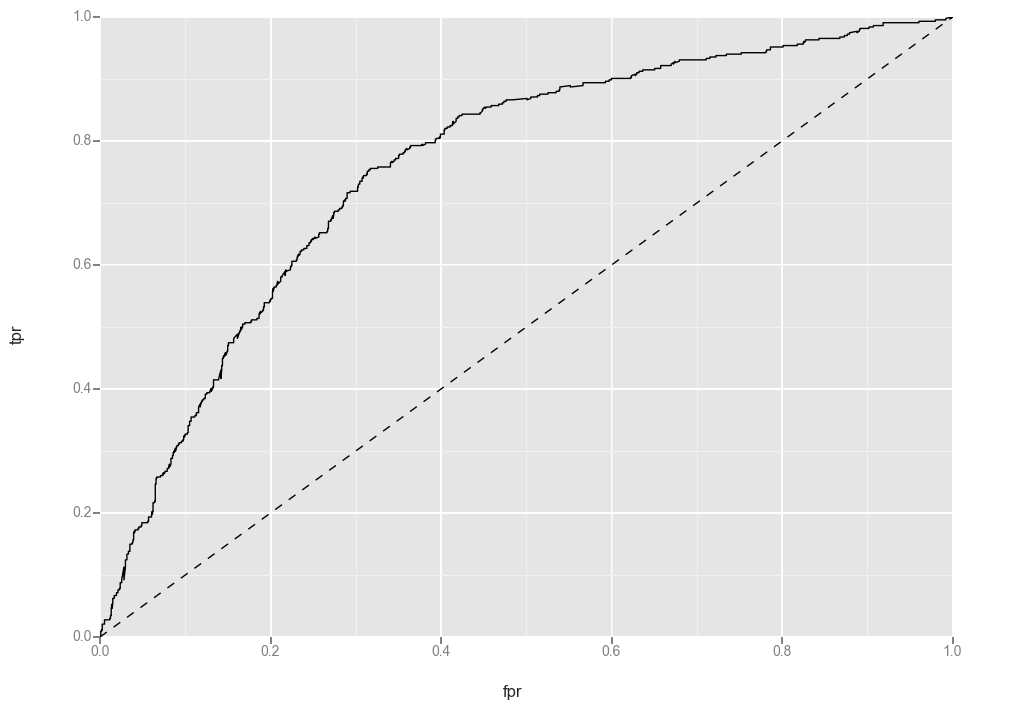

<ggplot: (305837860)>

In [246]:
preds = logmodel.predict_proba(a_test)[:,1]
fpr, tpr, _ = metrics.roc_curve(b_test, preds,pos_label='Tsu')

df = pd.DataFrame(dict(fpr=fpr, tpr=tpr))
ggplot(df, aes(x='fpr', y='tpr')) +\
    geom_line() +\
    geom_abline(linetype='dashed')

In [247]:
from sklearn.metrics import confusion_matrix

In [248]:
metrics.confusion_matrix(b_test,predictions)

array([[1068,   74],
       [ 333,  101]])

In [249]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import roc_auc_score, make_scorer

# little hack to filter out Proba(y==1)
def roc_auc_score_proba(y_true, proba):
    return roc_auc_score(y_true, proba[:, 1])

# define your scorer
auc = make_scorer(roc_auc_score_proba, needs_proba=True)

# define your classifier
clf = LogisticRegressionCV(scoring=auc,cv=10)

# train
clf.fit(a_train, b_train)

# have look at the scores
print(clf.scores_)

{'Tsu': array([[ 0.66972119,  0.74719331,  0.79507435,  0.79737918,  0.79775093,
         0.7977881 ,  0.7977881 ,  0.7977881 ,  0.7977881 ,  0.7977881 ],
       [ 0.64578358,  0.69865672,  0.72880597,  0.7308209 ,  0.73063433,
         0.73074627,  0.73074627,  0.73074627,  0.73074627,  0.73074627],
       [ 0.66600746,  0.73429104,  0.75559701,  0.7538806 ,  0.75373134,
         0.75373134,  0.75369403,  0.75369403,  0.75369403,  0.75369403],
       [ 0.6323694 ,  0.69774254,  0.75192164,  0.75505597,  0.75565299,
         0.75554104,  0.75554104,  0.75554104,  0.75554104,  0.75554104],
       [ 0.61947761,  0.68899254,  0.7380597 ,  0.74354478,  0.74343284,
         0.74343284,  0.74347015,  0.74343284,  0.74343284,  0.74343284],
       [ 0.6458616 ,  0.7036032 ,  0.73873059,  0.73922056,  0.73993668,
         0.73993668,  0.73993668,  0.73989899,  0.73993668,  0.73989899],
       [ 0.68430574,  0.76726217,  0.79063018,  0.78727574,  0.78614503,
         0.78610734,  0.78606965,  0.

In [250]:
ytest_cv_logistic=clf.predict(a_test)

In [251]:
metrics.accuracy_score(ytest_cv_logistic,b_test)

0.74302030456852797

## Prediction of Tsunami using SVM

In [252]:
model_svm=svm.SVC()

In [253]:
model_svm.fit(a_train,b_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [254]:
y1_test_predicted =model_svm.predict(a_test)

In [255]:
metrics.accuracy_score(y_pred=y1_test_predicted,y_true=b_test)

0.7874365482233503

In [256]:
metrics.confusion_matrix(y_pred=y1_test_predicted,y_true=b_test)

array([[1042,  100],
       [ 235,  199]])

In [257]:
##Crossvalidation
from sklearn.model_selection import GridSearchCV

In [258]:
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]}]

In [259]:
scores = ['precision', 'recall']
#scores=['accuracy']
for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(svm.SVC(C=1), tuned_parameters, cv=10,
                       scoring='%s_macro' % score)
    clf.fit(a_train, b_train)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = b_test, clf.predict(a_test)
    print(classification_report(y_true, y_pred))
    print()

# Tuning hyper-parameters for precision

Best parameters set found on development set:

{'kernel': 'rbf', 'C': 1000, 'gamma': 0.001}

Grid scores on development set:

0.717 (+/-0.026) for {'kernel': 'rbf', 'C': 1, 'gamma': 0.001}
0.714 (+/-0.052) for {'kernel': 'rbf', 'C': 1, 'gamma': 0.0001}
0.731 (+/-0.040) for {'kernel': 'rbf', 'C': 10, 'gamma': 0.001}
0.716 (+/-0.044) for {'kernel': 'rbf', 'C': 10, 'gamma': 0.0001}
0.743 (+/-0.045) for {'kernel': 'rbf', 'C': 100, 'gamma': 0.001}
0.718 (+/-0.037) for {'kernel': 'rbf', 'C': 100, 'gamma': 0.0001}
0.745 (+/-0.046) for {'kernel': 'rbf', 'C': 1000, 'gamma': 0.001}
0.731 (+/-0.049) for {'kernel': 'rbf', 'C': 1000, 'gamma': 0.0001}

Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.

             precision    recall  f1-score   support

         No       0.83      0.89      0.86      1142
        Tsu       0.64      0.50      0.56       434

avg / total    

In [260]:
clf.best_estimator_

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [261]:
metrics.accuracy_score(y_pred,y_true)

0.7899746192893401

## Conclusion - SVM has higher accuracy over Logistic Regression (74%) and does better predictions with an accuracy of about 80%